In [60]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
plt.rc('font', size=18)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend', fontsize=18)
plt.rc('lines', markersize=10)

In [61]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model

In [62]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [63]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [64]:
def normalize(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

In [65]:
x_train = normalize(x_train)
x_test = normalize(x_test)

In [66]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [67]:
print(x_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 10)


In [68]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 32)        25632     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 4, 4, 64)         

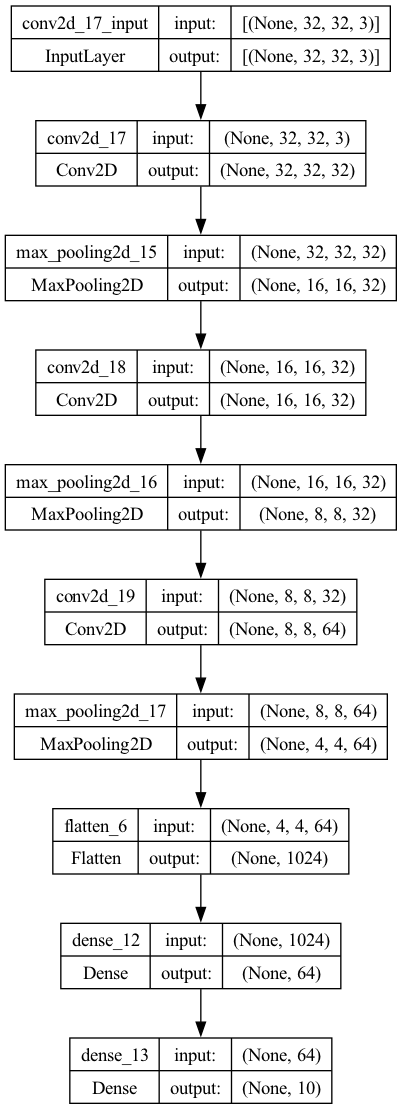

In [69]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [70]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
  1/313 [..............................] - ETA: 1:52 - loss: 2.3523 - accuracy: 0.0859

2023-09-27 16:50:47.648889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 1.7035 - accuracy: 0.3731

2023-09-27 16:50:55.121758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 9s 26ms/step - loss: 1.7035 - accuracy: 0.3731 - val_loss: 1.4551 - val_accuracy: 0.4742
Epoch 2/10
313/313 [==============================] - 8s 24ms/step - loss: 1.3650 - accuracy: 0.5121 - val_loss: 1.2701 - val_accuracy: 0.5557
Epoch 3/10
313/313 [==============================] - 8s 25ms/step - loss: 1.2333 - accuracy: 0.5636 - val_loss: 1.1755 - val_accuracy: 0.5926
Epoch 4/10
313/313 [==============================] - 8s 25ms/step - loss: 1.1499 - accuracy: 0.5972 - val_loss: 1.1891 - val_accuracy: 0.5845
Epoch 5/10
313/313 [==============================] - 8s 24ms/step - loss: 1.0815 - accuracy: 0.6260 - val_loss: 1.0891 - val_accuracy: 0.6262
Epoch 6/10
313/313 [==============================] - 8s 24ms/step - loss: 1.0452 - accuracy: 0.6429 - val_loss: 1.1162 - val_accuracy: 0.6241
Epoch 7/10
313/313 [==============================] - 8s 24ms/step - loss: 1.0324 - accuracy: 0.6515 - val_loss: 1.1180 - val_accuracy: 0.6290
Epoch 8/10

1/1 [==============================] - 0s 13ms/step


2023-09-27 16:52:04.852392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 13ms/step


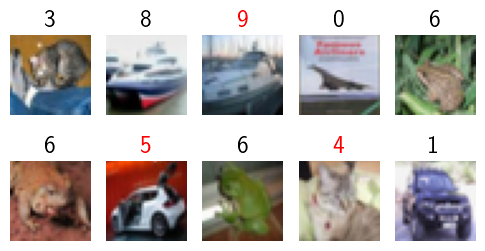

In [71]:
fig, axes = plt.subplots(2, 5, figsize=(6, 3))
for i in range(10):
    axes[i//5, i%5].imshow(x_test[i])
    axes[i//5, i%5].set_title(np.argmax(model.predict(x_test[i:i+1])), color='r' if np.argmax(model.predict(x_test[i:i+1])) != np.argmax(y_test[i]) else 'k')
    axes[i//5, i%5].axis('off')
plt.show()

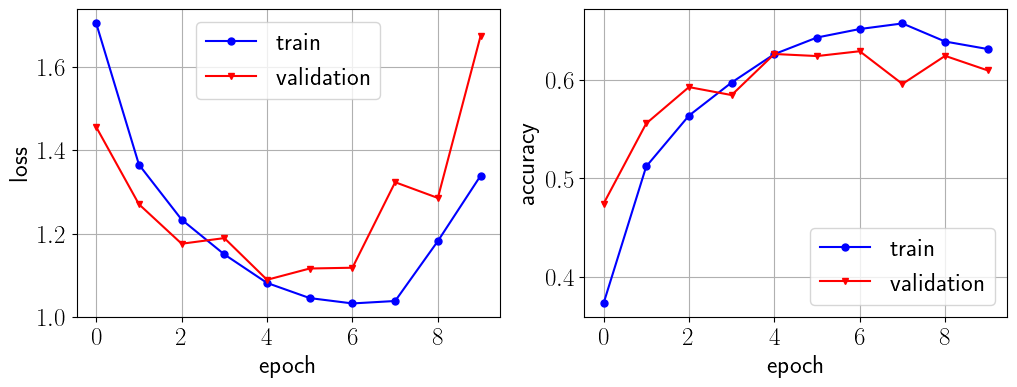

In [72]:
# Plot loss and accuracy
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
color_train = 'b'
color_val = 'r'
marker_train = 'o'
marker_val = 'v'
marker_size = 5
axes[0].plot(history.history['loss'], color=color_train, marker=marker_train, label='train', markersize=marker_size)
axes[0].plot(history.history['val_loss'], color=color_val, marker=marker_val, label='validation', markersize=marker_size)
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss')
axes[0].legend()
axes[0].grid()
axes[1].plot(history.history['accuracy'], color=color_train, marker=marker_train, label='train', markersize=marker_size)
axes[1].plot(history.history['val_accuracy'], color=color_val, marker=marker_val, label='validation', markersize=marker_size)
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('accuracy')
axes[1].legend()
axes[1].grid()
plt.show()

In [73]:
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

79/79 [==============================] - 1s 12ms/step - loss: 1.7479 - accuracy: 0.5994
test loss, test acc: [1.747948408126831, 0.599399983882904]
